In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('placement.csv')

In [9]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

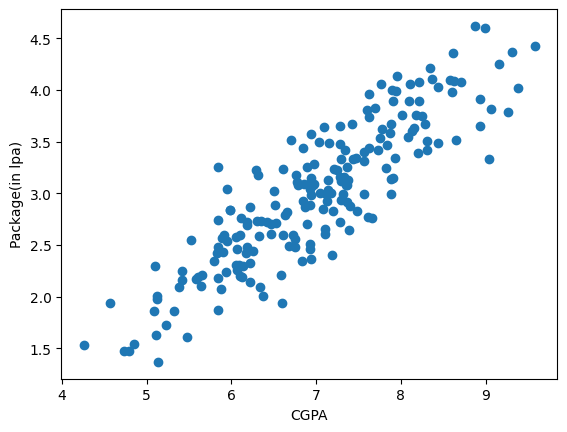

In [10]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [11]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [12]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [13]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [19]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [20]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [21]:
lr.predict(x_test.iloc[1].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

In [22]:
lr.predict(x_test.iloc[2].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.38464568])

Text(0, 0.5, 'Package(in lpa)')

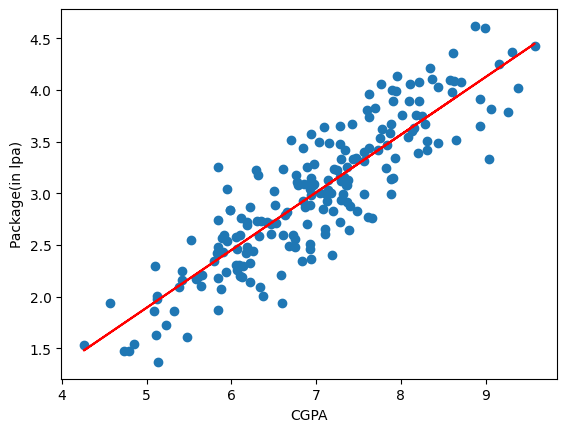

In [23]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [24]:
m = lr.coef_

In [25]:
b = lr.intercept_

In [26]:
# y = mx + b
m * 8.58 + b

array([3.89111601])

In [27]:
m * 9.5 + b

array([4.40443183])

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
y_pred = lr.predict(x_test)

In [30]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [31]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [32]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [33]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [34]:
print("r2_score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

r2_score 0.780730147510384


In [35]:
x_test.shape

(40, 1)

In [36]:
# adjusted r2 score
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [37]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.331213,3.26
1,5.12,0.758341,1.98
2,7.82,0.895000,3.25
3,7.42,0.686200,3.67
4,6.94,0.077840,3.57


In [38]:
x = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(x_test)

In [43]:
print("r2 score:",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

r2 score: 0.7809074280922581


In [44]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7690645863675153

In [45]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]

In [46]:
new_df2.sample(5)

,cgpa,iq,package
174,7.32,3.69,2.99
63,9.16,3.15,4.25
115,8.35,4.11,4.21
124,6.06,2.81,2.31
134,7.20,2.93,2.83


Text(0, 0.5, 'package(in lpa)')

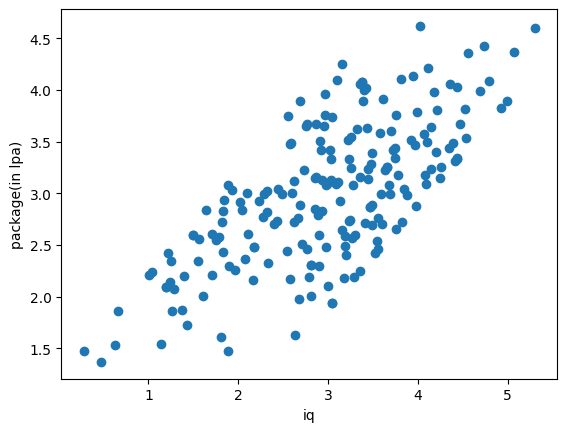

In [47]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('package(in lpa)')

In [48]:
x = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [50]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [51]:
print("r2 score:",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

r2 score: 0.8339953580523685


In [52]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8250221341633073